Целью данного исследования является определение с помощью построения логистической регрессии значимости факторов, влияющих на вероятность выжить во время крушения Титаника.
Ссылка на датасет: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as sf
%matplotlib inline

In [98]:
titanic = pd.read_csv('C://Users/psy_f/Desktop/titanic.csv')
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Для анализа выживаемости пассажиров Титаника возьмём только следующие данные:
1) Survived - выжил ли пассажир \
2) Pclass - в каком классе он плыл на Титанике \
3) Sex - пол пассажира \
4) Age - возраст пассажира на момент крушения

In [99]:
titanic = titanic[['Survived','Pclass','Sex','Age']]

In [100]:
titanic.head(5)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


Text(0.5, 1.0, 'Распределение выживаемости пассажиров')

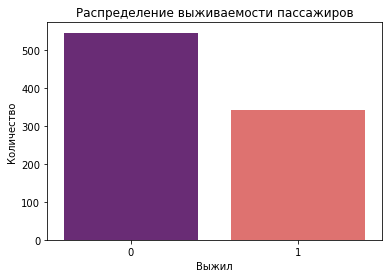

In [120]:
sns.countplot (x='Survived', data = titanic, palette = 'magma')
plt.ylabel ('Количество')
plt.xlabel ('Выжил')
plt.title ('Распределение выживаемости пассажиров')

Из графика выше можно сделать вывод, что большинство пассажиров Титаника погибли при крушении.

Следующий график показывает распределение выживших и погибших пассажиров в зависимости от пола пассажира. На основании этого графика можно сделать предварительный вывод о том, что подавляющее число мужчин, в отличие от женщин, погибло во время крушения.

Text(0.5, 1.0, 'Выживаемость на Титанике\nв зависимости от пола пассажира')

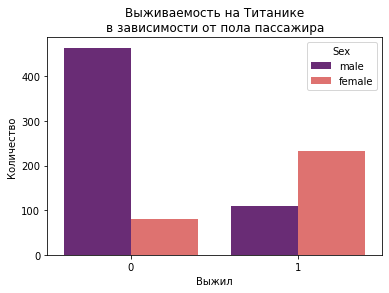

In [145]:
sns.countplot (x='Survived', data = titanic, hue ='Sex', palette = 'magma')
plt.ylabel ('Количество')
plt.xlabel ('Выжил')
plt.title ('Выживаемость на Титанике\nв зависимости от пола пассажира')

График ниже показывает распределение выживших и погибших пассажиров в зависимости от того класса, в котором они были. Из него можно найти подтверждение результатам нашей логистической регрессии, а именно то, что чем ниже класс билета, тем больше вероятность погибнуть.

Text(0.5, 1.0, 'Выживаемость на Титанике\nв зависимости от класса')

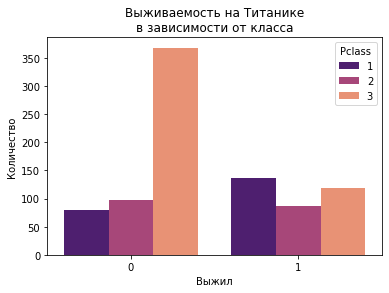

In [146]:
sns.countplot (x='Survived', data = titanic, hue='Pclass', palette = 'magma')
plt.ylabel ('Количество')
plt.xlabel ('Выжил')
plt.title ('Выживаемость на Титанике\nв зависимости от класса')

Далее, давайте построим логистическую регрессию, которая будет показывать, как такие биномиальные предикторы, как класс и пол, а также количественный предиктор возраста пассажира, связаны с тем, выжил пассажир или нет. Также с помощью значимости коэффициентов можно будет сделать вывод о статистической значимости того или иного предиктора. Мы строим логистическую регрессию для того, чтобы перейти от биномиальных значений (0 и 1) в зависимой переменной к логарифму шанса, который изменяется от минус бесконечности до плюс бесконечности. 

In [147]:
results = sf.glm('Survived ~ C(Pclass) + C(Sex) + Age', titanic, family = sm.families.Binomial()).fit()

In [148]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  887
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -400.80
Date:                Mon, 04 Apr 2022   Deviance:                       801.59
Time:                        18:20:23   Pearson chi2:                     932.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.6349      0.370      9.812      0.000       2.909       4.361
C(Pclass)[T.2]    -1.1991      0.262     -4.584      0.000      -1.712      -0.686
C(Pclass)[T.3]    -2.4554      0.253     -9.697      0.000      -2.952      -1.959
C(Sex)[T.male]    -2.5887      0.187    -13.843      0.000      -2.955      -2.222
Age               -0.0343      0.007     -4.787      0.000      -0.048      -0.020
==================================================================================
"""

Из результатов построения данной логистической регрессии можно увидеть, что все значения коэффициентов наших предикторов являются статистически значимыми (для всех предикторов p-value очень близок к нулю). 
Коэффициент в Intercept означает логарифм шанса выжить для женщины из первого класса. Из анализа коэффициентов можно сделать вывод, что чем ниже класс, в котором плыл пассажир, и чем больше его возраст, тем меньше вероятность оказаться выжившим. Аналогично, на Титанике с точки зрения вероятности выжить было сильно хуже быть мужчиной (см. график ниже). Возраст пассажира также имеет обратную взаимосвязь с вероятностью выжить на Титанике.
Таким образом, с помощью построения данной логистической регрессии мы определили, что коэффициенты при факторах пола, возраста и класса билета пассажиров являются статистически значимыми.